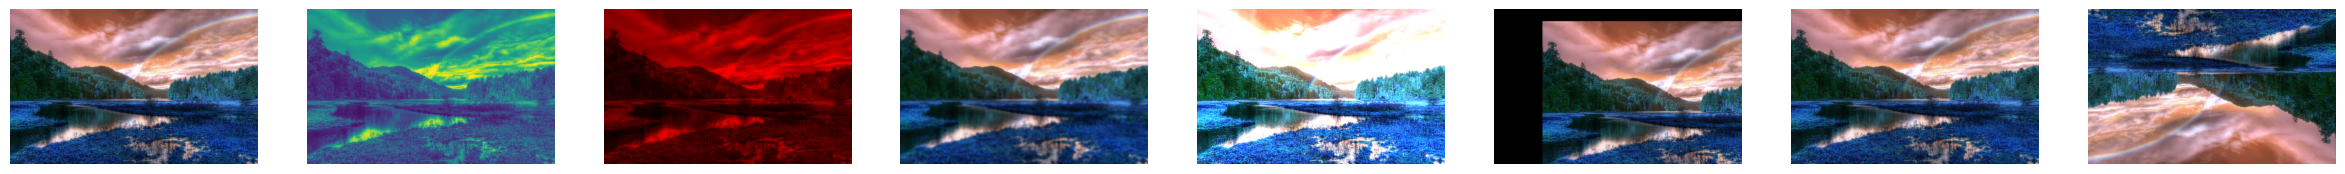

In [1]:
import cv2
import numpy as np
import imutils as imu
import matplotlib.pyplot as plt
from IPython.display  import Audio

beta = 2
alpha = 50
image = cv2.imread('imagewtvr.jpeg')


rows , cols = image.shape[:2]
x = 200
y = 50
h , w = image.shape[:2]
new_h = int(h*0.5)
new_w = int(w*0.5)


matrix = np.float32([[1,0,x],[0,1,y]])

tranlatedImage = cv2.warpAffine(image, matrix, (cols, rows))
denoisedImage = cv2.medianBlur(image,ksize= 9) #should be odd number
contrastImage =  cv2.convertScaleAbs(image, alpha, beta)
rotatedImage  = cv2.rotate(image,cv2.ROTATE_180)
rotatImage  = imu.rotate(image,120)
saclingImage= cv2.resize(image,(new_w,new_h))
imageGrey = cv2.imread('imagewtvr.jpeg', cv2.IMREAD_GRAYSCALE)
color = cv2.cvtColor(imageGrey, cv2.COLOR_GRAY2BGR)
# c = bgr | c = hsv | 
#   B = 0 | H = 0   |
#   G = 1 | S = 1   |
#   R = 2 | V = 2   |  
#     h w c 
#     ^ ^ ^
#     | | |
color[:,:,0] = 0 
color[:,:,1] = 0
colore = cv2.cvtColor(color, cv2.COLOR_RGB2BGR)

colored = cv2.applyColorMap(color, cv2.COLORMAP_JET)

plt.figure(figsize=(30,12))

plt.subplot(1,8,1)
plt.imshow(image)
plt.axis("off")

plt.subplot(1,8,2)
plt.imshow(imageGrey)
plt.axis("off")
plt.subplot(1,8,3)
plt.imshow(colore)
plt.axis("off")
plt.subplot(1,8,4)
plt.imshow(denoisedImage)
plt.axis("off")
plt.subplot(1,8,5)
plt.imshow(contrastImage)
plt.axis("off")
plt.subplot(1,8,6)
plt.imshow(tranlatedImage)
plt.axis("off")
plt.subplot(1,8,7)
plt.imshow(saclingImage)
plt.axis("off")
plt.subplot(1,8,8)
plt.imshow(rotatedImage)
plt.axis("off")


cv2.imwrite("Denoisedimage.jpeg", denoisedImage)
cv2.imwrite("ContrastImage.jpeg", contrastImage)
cv2.imwrite("TranlatedImage.jpeg", tranlatedImage)
cv2.imwrite("SaclingImage.jpeg", saclingImage)
cv2.imwrite("RotatedImage.jpeg", rotatImage)
cv2.waitKey(0)
cv2.destroyAllWindows()